In [267]:
import numpy as np #匯入 numpy 方便建立向量（Vector）、矩陣（Matrix）等進行高效率的大量資料運算

In [268]:
import pandas as pd # 表格化資料 用來對資料進行重構、切割、聚合及選擇子集合等操作

In [269]:
from sklearn import preprocessing #資料標準化

In [270]:
import csv #匯入 csv 模組

In [271]:
from sklearn.model_selection import train_test_split # Splitting train set to train data set and validation data set

In [272]:
from sklearn import svm #(a)支援向量機(Support Vector Machine, SVM)

In [273]:
from sklearn.neighbors import KNeighborsClassifier # (b)K-近鄰演算法(K-nearest neighbors, KNN):以鄰近點作凝聚，綜合鄰近點，模擬出數據預測值

In [274]:
from sklearn.tree import DecisionTreeClassifier #(c)決策樹(Decision Tree, DT)

In [275]:
from sklearn.ensemble import RandomForestClassifier #(d)隨機森林(Random Forest, RF)

In [276]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay #混淆矩陣(Confusion matrix)分析

In [187]:
from sklearn import metrics #模型分數

In [277]:
train_file_url= 'Mobile Price Classification/train.csv' # train檔案位置

In [278]:
test_file_url= 'Mobile Price Classification/test.csv' # test檔案位置

In [279]:
train_data = pd.read_csv(train_file_url); #讀訓練檔

In [280]:
test_data = pd.read_csv(test_file_url); #讀測試檔

In [281]:
#找出影響價格範圍的屬性(設相關係數 > 0.1 ) battery_power px_height px_width ram 
#train_data.corr(method ='pearson')['price_range']
train_data.corr(method ='pearson')['price_range'].abs() >= 0.1 

battery_power     True
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height         True
px_width          True
ram               True
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range       True
Name: price_range, dtype: bool

In [282]:
X_train_data = train_data[["ram","battery_power","px_width","px_height"]]
Y_train_data = train_data[["price_range"]] # target: predict price range
X_test_data = test_data[["ram","battery_power","px_width","px_height"]]
X_train_data = preprocessing.scale(X_train_data) # normalize X_train_data
X_test_data = preprocessing.scale(X_test_data) # normalize X_test_data

In [283]:
# Splitting the data into train and validation set in 8:2 ;random_state = 42確保每次跑出來的 validation data training data都會一樣
X_train, X_valid, y_train, y_valid = train_test_split(X_train_data, Y_train_data, test_size = 0.2, random_state = 42)

In [284]:
#.values will give the values in a numpy array (shape: (n,1)) [[1][2][0]...[2][3][1]]
#.ravel will convert that array shape to (n, ) (i.e. flatten it) [1 2 0 ... 2 3 1]
y_train = y_train.values.ravel()

In [285]:
# 建立 kernel='linear' 模型 C: 限制模型的複雜度，防止過度擬合。
svm_model = svm.SVC(kernel='linear', C=1)

In [286]:
# 使用(a)支援向量機 進行訓練
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [287]:
# 預測成功的比例 計算準確率
print('訓練集: ',svm_model.score(X_train,y_train))
print('驗證集: ',svm_model.score(X_valid,y_valid))

訓練集:  0.959375
驗證集:  0.9675


In [288]:
# 使用支援向量機 進行預測
svm_test_predicted = svm_model.predict(X_test_data)
print(svm_test_predicted)

[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2 1 3 1 1 3 0 2 0 3 0 2 0 3 0 1 1 3
 1 2 1 1 2 0 0 0 1 0 3 1 2 1 0 3 0 3 1 3 1 1 3 3 3 0 1 1 1 2 3 1 2 1 2 2 3
 3 0 2 0 2 3 0 3 3 0 3 0 3 1 3 0 1 2 2 1 2 2 1 2 1 2 1 0 0 3 0 2 0 1 2 3 3
 2 1 3 3 3 3 2 3 0 0 3 2 1 2 0 3 2 3 1 0 2 2 1 3 1 1 0 3 2 1 2 1 2 2 3 3 3
 2 3 2 3 1 0 3 2 3 3 3 3 2 2 3 3 3 3 1 0 3 0 0 0 2 1 0 1 0 0 1 2 1 0 0 1 1
 2 2 1 0 0 0 1 0 3 1 0 2 2 2 3 1 1 3 2 3 2 2 1 0 0 1 2 0 2 3 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 0 2 2 1 2 1 3 0 3 1 2 0 0 2 1 3 3 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 0 2 3 1 1 3 2 0 3 0 0 2 1 0 3 2 3 3 2 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 0 0 3 2 0 2 3 1
 2 2 2 3 1 3 3 2 2 2 3 3 0 3 0 3 1 3 1 3 3 0 1 0 3 1 3 2 3 0 0 0 0 2 0 0 2
 2 1 2 2 2 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 1 0 1 0 0 1
 1 0 0 0 2 2 3 2 3 0 3 0 3 0 1 1 0 2 0 3 2 3 3 1 3 1 3 1 3 2 0 1 2 1 1 0 0
 0 1 2 1 0 3 2 0 2 2 0 0 3 1 2 0 2 3 3 0 3 0 2 3 3 3 0 2 0 2 3 0 1 1 0 0 1
 1 1 3 3 3 2 3 1 2 2 3 3 

In [289]:
svm_X_predictions = svm_model.predict(X_valid)
print(svm_X_predictions)

[0 2 1 3 1 1 2 0 3 1 0 0 2 3 3 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 2 2 2 1 3 1 3 1 0 0 1 1 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 1 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 2 1 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 3 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 3 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 3 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 0 1 2 2 1 3 0 2 3 2 3 2 1 0 1 0 3 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 2 3 3 1 0 1 0 1 2 3 0 3
 3 2 1 3 0 0 2 1 3 2 0 1 1 1 1 1 3 2 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2]


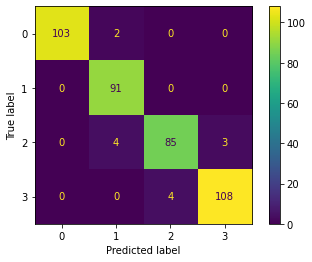

In [290]:
svm_matrix = confusion_matrix(y_valid,svm_X_predictions)
ConfusionMatrixDisplay(svm_matrix,display_labels=svm_model.classes_).plot();

In [291]:
# price_range 分為 4區間
print(classification_report(y_valid, svm_X_predictions, labels=[0, 1, 2, 3])) 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.94      1.00      0.97        91
           2       0.96      0.92      0.94        92
           3       0.97      0.96      0.97       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [292]:
# n_neighbors int, default=5 代表某資料在定義標籤時會參考最靠近的五筆資料
knn_model = KNeighborsClassifier() 

In [293]:
# 使用(b)K-近鄰演算法 進行訓練
knn_model.fit(X_train,y_train) 

KNeighborsClassifier()

In [294]:
# 預測成功的比例 計算準確率
print('訓練集: ',knn_model.score(X_train,y_train))
print('驗證集: ',knn_model.score(X_valid,y_valid))

訓練集:  0.930625
驗證集:  0.915


In [295]:
# 使用 K-近鄰演算法 進行預測
knn_test_predicted=knn_model.predict(X_test_data)
print(knn_test_predicted)

[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2 1 2 1 1 3 0 2 0 3 0 2 0 3 0 0 1 3
 1 2 0 1 2 0 0 0 1 0 3 1 2 1 0 3 0 3 1 3 1 1 3 3 2 0 2 0 1 2 3 1 2 1 2 2 3
 3 0 2 0 1 3 0 3 3 0 3 0 3 1 3 1 1 2 2 1 1 2 0 2 1 2 1 1 0 3 0 2 0 1 2 3 3
 2 1 3 3 3 3 1 3 0 0 3 2 1 1 0 3 2 3 2 0 2 1 1 3 1 2 0 3 2 1 3 1 3 2 3 3 2
 2 3 2 3 0 0 3 2 3 3 3 3 2 2 3 3 3 3 1 0 3 0 0 0 2 1 0 1 0 0 0 2 1 0 0 1 1
 2 2 1 0 0 0 1 0 3 1 0 2 2 2 3 1 1 3 2 3 2 2 1 1 0 1 2 0 2 3 3 0 2 0 3 2 3
 3 0 0 1 0 3 0 1 0 2 2 1 2 0 3 0 3 1 2 0 0 2 1 3 3 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 0 2 3 2 1 3 2 1 3 0 0 3 0 0 3 3 3 3 2 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 0 0 3 2 0 2 3 1
 2 2 2 3 1 3 3 1 2 2 3 3 1 3 0 3 1 3 1 3 3 0 1 0 3 1 3 1 3 0 0 0 0 2 0 0 2
 2 1 2 2 2 0 1 0 0 3 2 0 3 1 2 2 1 1 3 1 1 2 2 1 2 0 1 1 0 3 2 1 0 1 0 0 1
 1 0 1 0 2 2 3 2 3 0 2 0 3 0 1 1 1 1 0 3 2 3 2 1 3 1 3 1 3 2 0 1 1 1 1 0 0
 0 1 2 1 0 2 2 0 2 2 0 0 3 1 2 1 2 3 3 0 3 0 2 3 3 3 0 2 0 1 2 0 2 1 0 0 1
 1 1 3 3 3 2 3 1 2 2 3 3 

In [296]:
knn_X_predictions = knn_model.predict(X_valid)
print(knn_X_predictions)

[0 2 1 3 1 1 2 0 2 1 0 0 2 3 2 2 3 3 1 0 0 1 1 2 0 1 2 2 2 0 0 0 3 0 2 1 2
 0 3 0 2 3 2 0 2 2 2 1 3 1 3 1 0 0 0 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 1 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 1 3 2 0 1 1 0
 0 3 1 2 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 1 2 3 1 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 1 2 3 3 2 1 0 1 2 2 3 3 0 1 0 3 1 2 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 2 1 0 1 1 1 1 2 2 2 2 3 1 2 0 0 0 2 1 1 3 1 0 3 1 1 3 2
 3 0 0 1 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 3 3 0 3 1 2 3 3 2 1 0 3 3 1 3 3 3
 3 3 0 2 2 2 1 3 0 1 2 2 2 2 1 0 1 0 3 3 1 3 1 0 3 1 2 0 0 2 0 1 2 3 3 3 1
 1 0 1 3 3 1 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 1 3 2 3 1 0 1 0 1 2 3 0 3
 3 2 1 3 0 0 2 1 3 2 0 1 1 1 0 1 3 2 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 1 0 2 3 1 0 2 3 2 1 1 2]


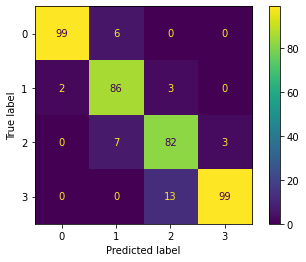

In [297]:
knn_matrix = confusion_matrix(y_valid,knn_X_predictions)
ConfusionMatrixDisplay(knn_matrix,display_labels=knn_model.classes_).plot();

In [298]:
# price_range 分為 4區間
print(classification_report(y_valid, knn_X_predictions, labels=[0, 1, 2, 3])) 

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       105
           1       0.87      0.95      0.91        91
           2       0.84      0.89      0.86        92
           3       0.97      0.88      0.93       112

    accuracy                           0.92       400
   macro avg       0.91      0.92      0.91       400
weighted avg       0.92      0.92      0.92       400



In [299]:
# criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
# max_depthint, default=None 
# None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.(default=2)
DTree_model = DecisionTreeClassifier()

In [300]:
# 使用(c)決策樹 進行訓練
DTree_model.fit(X_train,y_train) 

DecisionTreeClassifier()

In [301]:
# 預測成功的比例 計算準確率
print('訓練集: ',DTree_model.score(X_train,y_train))
print('驗證集: ',DTree_model.score(X_valid,y_valid))

訓練集:  1.0
驗證集:  0.8725


In [302]:
# 使用 決策樹 進行預測
Dtree_test_predicted = DTree_model.predict(X_test_data)
print(Dtree_test_predicted)

[3 3 2 3 1 3 3 1 3 0 3 3 0 0 3 0 2 1 3 2 0 2 2 1 3 0 2 0 3 0 2 0 3 0 1 1 3
 1 2 1 1 2 0 0 0 1 1 3 1 2 1 0 2 0 3 1 3 1 1 3 3 3 0 2 1 1 1 2 1 2 1 2 2 3
 3 0 2 0 2 3 0 3 3 0 3 0 3 1 2 0 1 2 2 0 2 1 0 2 1 3 1 0 0 2 1 2 0 1 2 3 3
 2 1 3 3 3 3 2 3 0 0 3 2 1 2 0 3 2 3 2 0 2 1 1 3 0 1 0 3 2 1 3 1 3 2 3 3 2
 2 3 3 3 0 0 3 2 3 3 3 3 2 2 3 3 3 3 1 0 3 0 0 0 2 1 0 1 1 0 1 3 1 0 0 1 1
 2 2 1 0 0 0 0 1 3 2 0 2 2 2 3 1 1 3 3 3 2 1 0 0 0 1 2 0 2 3 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 0 2 2 1 3 1 3 0 3 1 2 0 0 3 1 3 2 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 1 1 2 3 1 1 3 2 0 3 0 0 2 0 0 3 3 3 2 2 1 3 2 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 0 0 3 2 0 2 3 1
 3 2 2 3 1 3 3 2 2 2 3 3 0 3 1 3 1 3 1 3 3 0 1 0 3 1 3 2 3 0 0 0 0 2 0 0 2
 1 1 2 2 2 0 1 0 0 3 2 1 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 1 0 1 0 0 1
 1 0 0 0 2 2 3 2 3 0 2 0 3 0 1 1 1 1 0 3 2 3 3 1 3 1 3 1 3 2 1 2 2 2 1 0 0
 1 1 2 1 0 3 2 0 2 2 0 0 3 1 1 1 2 3 3 0 3 0 2 3 2 3 0 2 0 2 3 1 1 2 0 0 1
 1 1 3 3 3 2 2 1 2 2 2 3 

In [303]:
DTree_X_predictions = DTree_model.predict(X_valid)
print(DTree_X_predictions)

[0 2 1 3 1 2 2 0 2 1 0 1 2 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 2 2 1 1 2 1 3 1 0 0 0 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 3 0 0 3 2 2 3 2 1 0 1 3 2 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 1 0 3 2 0 1 1 0
 0 2 1 2 2 3 2 0 2 1 3 2 1 3 3 0 3 1 2 3 0 2 2 0 3 1 0 0 2 2 1 3 2 0 0 0 1
 2 3 3 2 1 0 2 2 0 1 0 2 2 3 3 3 1 0 1 2 2 3 3 1 0 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 1 2 2 3 3 1 2 0 0 0 2 1 1 3 1 1 3 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 3 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 1 1 2 3 1 3 0 1 3 2 2 2 1 0 2 0 2 3 1 3 1 0 3 1 2 0 0 3 0 1 3 3 3 3 0
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 1 3 2 0 2 1 2 1 0 0 1 3 2 3 1 0 1 1 1 2 3 0 3
 3 2 1 2 0 0 3 1 3 2 0 1 1 1 1 1 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 1 2 2 2
 3 3 3 2 1 2 0 3 2 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 1 1 1 2]


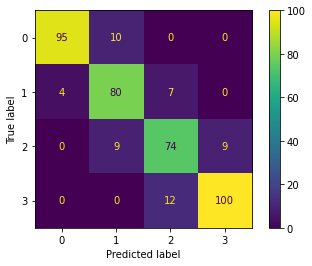

In [304]:
DTree_matrix = confusion_matrix(y_valid,DTree_X_predictions)
ConfusionMatrixDisplay(DTree_matrix,display_labels=DTree_model.classes_).plot();

In [305]:
# price_range 分為 4區間
print(classification_report(y_valid, DTree_X_predictions, labels=[0, 1, 2, 3])) 

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       105
           1       0.81      0.88      0.84        91
           2       0.80      0.80      0.80        92
           3       0.92      0.89      0.90       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.87      0.87       400



In [306]:
# n_estimators(default=100) The number of trees in the forest.
# max_depthint, default=None 
# None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.(default=2)
RForest_model = RandomForestClassifier()

In [307]:
# 使用(d) 隨機森林 進行訓練
RForest_model.fit(X_train,y_train) 

RandomForestClassifier()

In [308]:
# 預測成功的比例 計算準確率
print('訓練集: ',RForest_model.score(X_train,y_train))
print('驗證集: ',RForest_model.score(X_valid,y_valid))

訓練集:  1.0
驗證集:  0.935


In [309]:
# 使用 隨機森林 進行預測
RForest_test_predicted = RForest_model.predict(X_test_data)
print(RForest_test_predicted)

[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2 1 3 1 1 3 0 2 0 3 0 2 0 3 0 0 1 3
 1 2 1 1 2 0 0 0 1 0 3 1 2 1 0 3 0 3 1 3 1 1 3 3 3 0 1 1 1 1 3 1 2 1 2 2 3
 3 0 2 0 2 3 1 3 3 0 3 0 3 1 3 0 1 2 2 0 2 2 0 2 1 2 1 0 0 3 0 2 0 1 2 3 3
 3 1 3 3 3 3 2 3 0 0 3 2 1 1 0 3 2 3 2 0 2 1 1 3 1 1 0 3 2 1 3 1 3 2 3 3 2
 2 3 2 3 0 0 3 2 3 3 3 3 2 2 3 3 3 3 1 0 3 0 0 0 2 1 0 1 0 0 1 2 1 0 0 1 1
 2 2 1 0 0 0 1 0 3 1 0 2 2 2 3 1 2 3 2 3 2 2 1 0 0 1 2 0 2 3 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 0 2 2 1 2 1 3 0 3 1 2 0 0 2 1 3 3 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 1 2 3 2 1 3 2 0 3 0 0 2 0 0 3 2 3 3 2 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 0 0 3 2 0 2 3 1
 2 2 2 3 1 3 3 2 2 2 3 3 0 3 1 3 1 3 1 3 3 0 1 0 3 1 3 2 3 0 0 0 0 2 0 0 2
 2 1 2 2 2 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 1 0 1 0 0 1
 1 0 0 0 2 2 3 2 3 0 3 0 3 0 1 1 1 2 0 3 2 3 3 1 3 1 3 1 3 2 1 1 2 1 1 0 0
 0 1 2 1 0 3 2 0 2 2 0 0 3 1 1 0 3 2 3 0 3 0 2 3 2 3 0 2 0 2 3 0 1 1 0 0 1
 1 1 3 3 3 2 3 1 1 2 2 3 

In [310]:
RForest_X_predictions = RForest_model.predict(X_valid)
print(RForest_X_predictions)

[0 2 1 3 1 1 2 0 3 1 0 1 2 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 3 2 2 1 3 1 3 1 0 0 1 1 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 0 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 2 2 3 2 0 2 1 3 2 1 3 3 0 3 0 2 3 0 2 2 0 3 1 0 0 2 3 1 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 2 1 0 1 2 2 3 3 1 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 2 3 3 1 2 0 0 0 2 1 1 3 1 1 2 1 1 3 2
 3 0 0 2 1 2 0 1 2 0 2 3 2 0 1 3 3 0 1 3 3 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 0 1 2 2 1 3 0 2 3 2 2 2 1 0 2 0 3 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 3 2 3 1 0 1 0 1 2 3 0 3
 3 2 1 2 0 0 3 1 3 2 0 1 1 1 1 1 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 2 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 1 1 1 2]


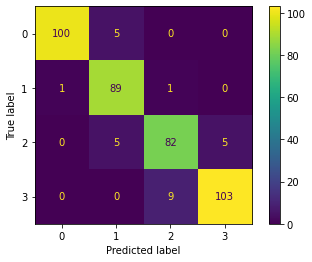

In [311]:
RForest_matrix = confusion_matrix(y_valid,RForest_X_predictions)
ConfusionMatrixDisplay(RForest_matrix,display_labels=RForest_model.classes_).plot();

In [312]:
# price_range 分為 4區間
print(classification_report(y_valid, RForest_X_predictions, labels=[0, 1, 2, 3])) 

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       105
           1       0.90      0.98      0.94        91
           2       0.89      0.89      0.89        92
           3       0.95      0.92      0.94       112

    accuracy                           0.94       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.94      0.94      0.94       400

